In [79]:
%matplotlib inline

In [80]:
# We must first import relevant packages to this assignment.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [81]:
# Here we define where our data is located so that we can later use it.
city_data_csv_path = "Data/city_data.csv"
ride_data_csv_path = "Data/ride_data.csv"

In [82]:
city_data = pd.read_csv(city_data_csv_path)
ride_data = pd.read_csv(ride_data_csv_path)

In [83]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [84]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [85]:
city_ride_merged_dataframe = pd.merge(city_data, ride_data, how="left", on=["city", "city"])
city_ride_merged_dataframe.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [86]:
average_fare_per_city = city_ride_merged_dataframe.groupby("city")["fare"].mean()
average_fare_per_city.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

# Note to self: pick up here:

In [87]:
total_rides_per_city_urban = city_ride_merged_dataframe[city_ride_merged_dataframe["type"] == "Urban"].groupby("city")["ride_id"].count()
total_rides_per_city_suburban = city_ride_merged_dataframe[city_ride_merged_dataframe["type"] == "Suburban"].groupby("city")["ride_id"].count()
total_rides_per_city_rural = city_ride_merged_dataframe[city_ride_merged_dataframe["type"] == "Rural"].groupby("city")["ride_id"].count()

In [88]:
print(total_rides_per_city_urban.head())
print(total_rides_per_city_suburban.head())
print(total_rides_per_city_rural.head())

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64
city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64
city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64


In [89]:
average_fare_per_city_urban = city_ride_merged_dataframe[city_ride_merged_dataframe["type"] == "Urban"].groupby("city")["fare"].mean()
average_fare_per_city_suburban = city_ride_merged_dataframe[city_ride_merged_dataframe["type"] == "Suburban"].groupby("city")["fare"].mean()
average_fare_per_city_rural = city_ride_merged_dataframe[city_ride_merged_dataframe["type"] == "Rural"].groupby("city")["fare"].mean()

In [90]:
print(average_fare_per_city_urban.head())
print(average_fare_per_city_suburban.head())
print(average_fare_per_city_rural.head())

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64
city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64
city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64


In [91]:
total_drivers_per_city = city_ride_merged_dataframe.groupby("city")["driver_count"].sum()
total_drivers_per_city.head()

city
Amandaburgh      216
Barajasview      572
Barronchester    176
Bethanyland      396
Bradshawfurt      70
Name: driver_count, dtype: int64

In [98]:
total_drivers_per_city_urban = city_ride_merged_dataframe[city_ride_merged_dataframe["type"] == "Urban"].groupby("city")["driver_count"].sum()
total_drivers_per_city_suburban = city_ride_merged_dataframe[city_ride_merged_dataframe["type"] == "Suburban"].groupby("city")["driver_count"].sum()
total_drivers_per_city_rural = city_ride_merged_dataframe[city_ride_merged_dataframe["type"] == "Rural"].groupby("city")["driver_count"].sum()

In [99]:
print(total_drivers_per_city_urban.head())
print(total_drivers_per_city_suburban.head())
print(total_drivers_per_city_rural.head())

city
Amandaburgh         216
Barajasview         572
Carriemouth        1404
Christopherfurt    1107
Deanville           931
Name: driver_count, dtype: int64
city
Barronchester    176
Bethanyland      396
Brandonfort      190
Colemanland      506
Davidfurt        391
Name: driver_count, dtype: int64
city
Bradshawfurt      70
Garzaport         21
Harringtonfort    24
Jessicaport        6
Lake Jamie        24
Name: driver_count, dtype: int64


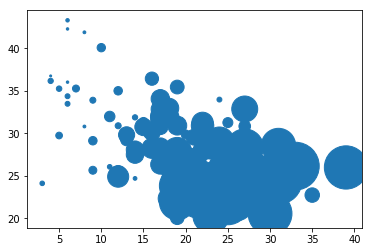

In [100]:
plt.scatter(total_rides_per_city, average_fare_per_city, total_drivers_per_city, label = city_types)

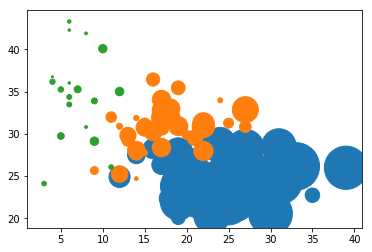

In [101]:
plt.scatter(total_rides_per_city_urban, average_fare_per_city_urban, total_drivers_per_city_urban)
plt.scatter(total_rides_per_city_suburban, average_fare_per_city_suburban, total_drivers_per_city_suburban)
plt.scatter(total_rides_per_city_rural, average_fare_per_city_rural, total_drivers_per_city_rural)
plt.show()